DATASET DUZENLEME

In [1]:
import pandas as pd

Coronavirüs hastalığı (COVID-19), yeni keşfedilen bir koronavirüsün neden olduğu bulaşıcı bir hastalıktır. COVİD-19 virüsüyle enfekte olan kişilerin çoğu, hafif ila orta şiddette solunum yolu hastalığı yaşayacak ve özel bir tedavi gerektirmeden iyileşecektir. Yaşlı insanların ve kardiyovasküler hastalık, diyabet, kronik solunum yolu hastalığı ve kanser gibi altta yatan tıbbi sorunları olanların ciddi hastalıklara yakalanma olasılığı daha yüksektir.
Pandemi süreci boyunca sağlık hizmeti sağlayıcılarının karşılaştığı temel sorunlardan biri tıbbi kaynak sıkıntısı ve bu kaynakların verimli bir şekilde dağıtılması için uygun bir planın olmamasıydı. Bu zor zamanlarda, bir kişinin testi pozitif çıktığı anda veya bundan önce ne tür bir kaynağa ihtiyaç duyabileceğini tahmin edebilmek, yetkililere, gerekli kaynakları temin edip ayarlayabilecekleri için çok büyük fayda sağlayacaktır.

Bu projenin ana hedefi, bir Kovid-19 hastasının mevcut semptomu, durumu ve tıbbi geçmişi göz önüne alındığında, hastanın yüksek risk altında olup olmadığını tahmin edecek bir makine öğrenimi modeli oluşturmaktır.
Veri seti Meksika hükümeti tarafından sağlandı  . Bu veri seti, ön koşullar da dahil olmak üzere hastayla ilgili çok sayıda anonimleştirilmiş bilgi içerir. Ham veri seti 21 benzersiz özellik ve 1.048.576 benzersiz hastadan oluşmaktadır. Boolean özelliklerinde 1 "evet", 2 "hayır" anlamına gelir. 97 ve 99 gibi değerler eksik veridir .
Veri setini bu zamana kadar 36.8K kişi indirmiştir
Veri seti en son 1 yıl önce güncellenmiştir.

* sex: Kadın için 1, erkek için 2.
* age: hastanın yaşı.
* classification: covid test bulguları. 1-3 arası değerler hastaya farklı derecelerde covid tanısı konduğu anlamına gelir.
4 veya daha yüksek olması, hastanın covid taşıyıcısı olmadığı veya testin sonuçsuz kaldığı anlamına gelir.
* patient type: Hastanın ünitede aldığı bakımın türü. 1'i eve dönüş ve 2'si hastaneye kaldırılma için.
* pneumonia: Hastanın halihazırda hava keselerinde iltihaplanma olup olmadığı.
* pregnancy: Hastanın hamile olup olmadığı.
* diabetes: hastanın diyabet hastası olup olmadığı.
* copd: Hastanın Kronik obstrüktif akciğer hastalığı olup olmadığını belirtir.
* asthma: hastanın astımı olup olmadığı.
* inmsupr: hastanın immün sistemi baskılanmış olup olmadığı.
* hypertension: hastanın hipertansiyonu olup olmadığı.
* cardiovascular: hastanın kalp veya kan damarlarıyla ilgili hastalığı olup olmadığı.
* renal chronic: hastanın kronik böbrek hastalığı olup olmadığı.
* other disease: hastanın başka bir hastalığı olup olmadığı.
* obesity: hastanın obez olup olmadığı.
* tobacco: hastanın tütün kullanıcısı olup olmadığı.
* usmr: Hastanın birinci, ikinci veya üçüncü düzey tıbbi birimlerde tedavi görüp görmediğini belirtir.
* medical : Ulusal Sağlık Sisteminin bakımı sağlayan kurum türü.
* intubed: hastanın ventilatöre bağlı olup olmadığı.
* icu: Hastanın Yoğun Bakım Ünitesine alınıp alınmadığını gösterir.
* date died: Hasta öldüyse ölüm tarihini belirtin, aksi takdirde 9999-99-99'u belirtin.


In [2]:
# reading csv files
data =  pd.read_csv('Covid Data.csv', sep=",")
df = data.copy() #her ihtimale karşı yedekleyelim
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
df.shape

(1048575, 21)

In [4]:
df.info() 
#kaba bir şekide veri setinin tüm yapısal bilgilerini verir.
#bir pandas dataframe şeklindeymiş
#1048575  adet gözlem değerimiz varmış
# 21  değişkenimiz varmış, değişkenlerin tipleri belirtilmiş
#Ramda 168.0+ MB alan tutmuş

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
df.columns = ["TedaviDurumu","TibbiBirim","Cinsiyet","HastaTuru","SaglikDurumu","Entube","Zaturre","Yas","Hamile","Diyabet",
             "KOAH","Astim","BagisiklikSistemi","HiperTansiyon","DigerHastalik","Kardiyovaskuler","Obezite","KronikBobrek",
             "Sigara","CovidSiniflandirma","ICU"] 
#değişken isimlerini değiştiriyoruz

In [6]:
df.info() 
#kaba bir şekide veri setinin tüm yapısal bilgilerini verir.
#bir pandas dataframe şeklindeymiş
#53940 adet gözlem değerimiz varmış
# 10 değişkenimiz varmış, değişkenlerin tipleri belirtilmiş
#Ramda 3MB alan tutmuş

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   TedaviDurumu        1048575 non-null  int64 
 1   TibbiBirim          1048575 non-null  int64 
 2   Cinsiyet            1048575 non-null  int64 
 3   HastaTuru           1048575 non-null  int64 
 4   SaglikDurumu        1048575 non-null  object
 5   Entube              1048575 non-null  int64 
 6   Zaturre             1048575 non-null  int64 
 7   Yas                 1048575 non-null  int64 
 8   Hamile              1048575 non-null  int64 
 9   Diyabet             1048575 non-null  int64 
 10  KOAH                1048575 non-null  int64 
 11  Astim               1048575 non-null  int64 
 12  BagisiklikSistemi   1048575 non-null  int64 
 13  HiperTansiyon       1048575 non-null  int64 
 14  DigerHastalik       1048575 non-null  int64 
 15  Kardiyovaskuler     1048575 non-

In [7]:
df

,TedaviDurumu,TibbiBirim,Cinsiyet,HastaTuru,SaglikDurumu,Entube,Zaturre,Yas,Hamile,Diyabet,...,Astim,BagisiklikSistemi,HiperTansiyon,DigerHastalik,Kardiyovaskuler,Obezite,KronikBobrek,Sigara,CovidSiniflandirma,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [8]:
# 'cinsiyet' sütunundaki değerleri değiştir
df['Cinsiyet'] = df['Cinsiyet'].map({1: 'Kadın', 2: 'Erkek'})

In [9]:
df

,TedaviDurumu,TibbiBirim,Cinsiyet,HastaTuru,SaglikDurumu,Entube,Zaturre,Yas,Hamile,Diyabet,...,Astim,BagisiklikSistemi,HiperTansiyon,DigerHastalik,Kardiyovaskuler,Obezite,KronikBobrek,Sigara,CovidSiniflandirma,ICU
0,2,1,Kadın,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,Erkek,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,Erkek,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,Kadın,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,Erkek,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,Erkek,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,Erkek,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,Erkek,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,Erkek,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [10]:
# Cinsiyeti 1 olanları kadın yap, değilse erkek yap
df.loc[df['SaglikDurumu'] != '9999-99-99', 'SaglikDurumu'] = 'Ölü'
df.loc[df['SaglikDurumu'] == '9999-99-99', 'SaglikDurumu'] = 'Sağ'

In [11]:
df

,TedaviDurumu,TibbiBirim,Cinsiyet,HastaTuru,SaglikDurumu,Entube,Zaturre,Yas,Hamile,Diyabet,...,Astim,BagisiklikSistemi,HiperTansiyon,DigerHastalik,Kardiyovaskuler,Obezite,KronikBobrek,Sigara,CovidSiniflandirma,ICU
0,2,1,Kadın,1,Ölü,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,Erkek,1,Ölü,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,Erkek,2,Ölü,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,Kadın,1,Ölü,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,Erkek,1,Ölü,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,Erkek,1,Sağ,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,Erkek,2,Sağ,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,Erkek,1,Sağ,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,Erkek,1,Sağ,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [12]:
# 'Yas' sütununu seç
yas_sutunu = df['Yas']
# DataFrame'den 'Yas' sütununu çıkar
df = df.drop('Yas', axis=1)

In [13]:
# Özel bir dönüşüm fonksiyonu tanımla
def safe_convert_to_str(value):
    if (value == 97 or value == 98 or value == 99):
        return pd.NA;
    else:
        return str(value);

# applymap fonksiyonunu kullanarak tüm DataFrame'i dönüştür
df = df.applymap(safe_convert_to_str)

In [14]:
# 'Yas' sütununu orijinal DataFrame'e geri ekle
df = pd.concat([yas_sutunu, df], axis=1)

In [15]:
#hiç eksik gözlem(değer) var mı
df.isnull().values.any() # isnull() values üzerinde bir sorgulama yap herhangi birisinde (any) eksik değer varsa true olarak dön.

True

In [16]:
df.isnull().sum() #tüm değişkenlerdeki toplam eksik değer sayısını verir. Hangi değişkende ne kadar eksik var sorusuna cevap alırız.

Yas                        0
TedaviDurumu               0
TibbiBirim                 0
Cinsiyet                   0
HastaTuru                  0
SaglikDurumu               0
Entube                855869
Zaturre                16003
Hamile                527265
Diyabet                 3338
KOAH                    3003
Astim                   2979
BagisiklikSistemi       3404
HiperTansiyon           3104
DigerHastalik           5045
Kardiyovaskuler         3076
Obezite                 3032
KronikBobrek            3006
Sigara                  3220
CovidSiniflandirma         0
ICU                   856032
dtype: int64

In [17]:
df

,Yas,TedaviDurumu,TibbiBirim,Cinsiyet,HastaTuru,SaglikDurumu,Entube,Zaturre,Hamile,Diyabet,...,Astim,BagisiklikSistemi,HiperTansiyon,DigerHastalik,Kardiyovaskuler,Obezite,KronikBobrek,Sigara,CovidSiniflandirma,ICU
0,65,2,1,Kadın,1,Ölü,<NA>,1,2,2,...,2,2,1,2,2,2,2,2,3,<NA>
1,72,2,1,Erkek,1,Ölü,<NA>,1,<NA>,2,...,2,2,1,2,2,1,1,2,5,<NA>
2,55,2,1,Erkek,2,Ölü,1,2,<NA>,1,...,2,2,2,2,2,2,2,2,3,2
3,53,2,1,Kadın,1,Ölü,<NA>,2,2,2,...,2,2,2,2,2,2,2,2,7,<NA>
4,68,2,1,Erkek,1,Ölü,<NA>,2,<NA>,1,...,2,2,1,2,2,2,2,2,3,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,40,2,13,Erkek,1,Sağ,<NA>,2,<NA>,2,...,2,2,2,2,2,2,2,2,7,<NA>
1048571,51,1,13,Erkek,2,Sağ,2,2,<NA>,2,...,2,2,1,2,2,2,2,2,7,2
1048572,55,2,13,Erkek,1,Sağ,<NA>,2,<NA>,2,...,2,2,2,2,2,2,2,2,7,<NA>
1048573,28,2,13,Erkek,1,Sağ,<NA>,2,<NA>,2,...,2,2,2,2,2,2,2,2,7,<NA>


In [18]:
# 'Yas' sütununu string'ten int'e çevir
df['Yas'] = pd.to_numeric(df['Yas'], errors='coerce').astype('Int64')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Yas                 1048575 non-null  Int64 
 1   TedaviDurumu        1048575 non-null  object
 2   TibbiBirim          1048575 non-null  object
 3   Cinsiyet            1048575 non-null  object
 4   HastaTuru           1048575 non-null  object
 5   SaglikDurumu        1048575 non-null  object
 6   Entube              192706 non-null   object
 7   Zaturre             1032572 non-null  object
 8   Hamile              521310 non-null   object
 9   Diyabet             1045237 non-null  object
 10  KOAH                1045572 non-null  object
 11  Astim               1045596 non-null  object
 12  BagisiklikSistemi   1045171 non-null  object
 13  HiperTansiyon       1045471 non-null  object
 14  DigerHastalik       1043530 non-null  object
 15  Kardiyovaskuler     1045499 non-

In [20]:
df.isnull().sum() #tüm değişkenlerdeki toplam eksik değer sayısını verir. Hangi değişkende ne kadar eksik var sorusuna cevap alırız.

Yas                        0
TedaviDurumu               0
TibbiBirim                 0
Cinsiyet                   0
HastaTuru                  0
SaglikDurumu               0
Entube                855869
Zaturre                16003
Hamile                527265
Diyabet                 3338
KOAH                    3003
Astim                   2979
BagisiklikSistemi       3404
HiperTansiyon           3104
DigerHastalik           5045
Kardiyovaskuler         3076
Obezite                 3032
KronikBobrek            3006
Sigara                  3220
CovidSiniflandirma         0
ICU                   856032
dtype: int64

In [21]:
# DataFrame'i CSV dosyasına kaydet
df.to_csv('duzenlenmis_Covid19.csv', index=False)

In [22]:
import pandas as pd

Coronavirüs hastalığı (COVID-19), yeni keşfedilen bir koronavirüsün neden olduğu bulaşıcı bir hastalıktır. COVİD-19 virüsüyle enfekte olan kişilerin çoğu, hafif ila orta şiddette solunum yolu hastalığı yaşayacak ve özel bir tedavi gerektirmeden iyileşecektir. Yaşlı insanların ve kardiyovasküler hastalık, diyabet, kronik solunum yolu hastalığı ve kanser gibi altta yatan tıbbi sorunları olanların ciddi hastalıklara yakalanma olasılığı daha yüksektir.
Pandemi süreci boyunca sağlık hizmeti sağlayıcılarının karşılaştığı temel sorunlardan biri tıbbi kaynak sıkıntısı ve bu kaynakların verimli bir şekilde dağıtılması için uygun bir planın olmamasıydı. Bu zor zamanlarda, bir kişinin testi pozitif çıktığı anda veya bundan önce ne tür bir kaynağa ihtiyaç duyabileceğini tahmin edebilmek, yetkililere, gerekli kaynakları temin edip ayarlayabilecekleri için çok büyük fayda sağlayacaktır.

Bu projenin ana hedefi, bir Kovid-19 hastasının mevcut semptomu, durumu ve tıbbi geçmişi göz önüne alındığında, hastanın yüksek risk altında olup olmadığını tahmin edecek bir makine öğrenimi modeli oluşturmaktır.
Veri seti Meksika hükümeti tarafından sağlandı  . Bu veri seti, ön koşullar da dahil olmak üzere hastayla ilgili çok sayıda anonimleştirilmiş bilgi içerir. Ham veri seti 21 benzersiz özellik ve 1.048.576 benzersiz hastadan oluşmaktadır. Boolean özelliklerinde 1 "evet", 2 "hayır" anlamına gelir. 
Veri setini bu zamana kadar 36.8K kişi indirmiştir
Veri seti en son 1 yıl önce güncellenmiştir.

* Cinsiyet: Kadın ve erkek değerlerin oluşmaktadır.
* Yas: hastanın yaşı.
* CovidSiniflandirma: covid test bulguları. 1-3 arası değerler hastaya farklı derecelerde covid tanısı konduğu anlamına gelir
. 4 veya daha yüksek olması, hastanın covid taşıyıcısı olmadığı veya testin sonuçsuz kaldığı anlamına gelir.
* HastaTuru: Hastanın ünitede aldığı bakımın türü. 1'i eve dönüş ve 2'si hastaneye kaldırılma için.
* KronikBobrek: Hastanın halihazırda hava keselerinde iltihaplanma olup olmadığı.
* Hamile: Hastanın hamile olup olmadığı.
* Diyabet: hastanın diyabet hastası olup olmadığı.
* KOAH: Hastanın Kronik obstrüktif akciğer hastalığı olup olmadığını belirtir.
* Astim: hastanın astımı olup olmadığı.
* BagisiklikSistemi: hastanın bağışıklılık sistemi baskılanmış olup olmadığı.
* HiperTansiyon: hastanın hipertansiyonu olup olmadığı.
* Kardiyovaskuler: hastanın kalp veya kan damarlarıyla ilgili hastalığı olup olmadığı.
* Zaturre: hastanın kronik böbrek hastalığı olup olmadığı.
* DigerHastalik: hastanın başka bir hastalığı olup olmadığı.
* Obezite: hastanın obez olup olmadığı.
* Sigara: hastanın tütün kullanıcısı olup olmadığı.
* TedaviTuru: Hastanın birinci, ikinci veya üçüncü düzey tıbbi birimlerde tedavi görüp görmediğini belirtir.
* TibbiBirim: Ulusal Sağlık Sisteminin bakımı sağlayan kurum türü.
* Entube: hastanın ventilatöre bağlı olup olmadığı.
* ICU: Hastanın Yoğun Bakım Ünitesine alınıp alınmadığını gösterir.
* SaglikDurumu: Hasta öldüyse ölüm tarihini belirtin, aksi takdirde 9999-99-99'u belirtin.

In [23]:
# reading csv files
data =  pd.read_csv('duzenlenmis_Covid19.csv', sep=",")
df = data.copy() #her ihtimale karşı yedekleyelim
df.head()

,Yas,TedaviDurumu,TibbiBirim,Cinsiyet,HastaTuru,SaglikDurumu,Entube,Zaturre,Hamile,Diyabet,...,Astim,BagisiklikSistemi,HiperTansiyon,DigerHastalik,Kardiyovaskuler,Obezite,KronikBobrek,Sigara,CovidSiniflandirma,ICU
0,65,2,1,Kadın,1,Ölü,NaN,1.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,72,2,1,Erkek,1,Ölü,NaN,1.0,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,55,2,1,Erkek,2,Ölü,1.0,2.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,53,2,1,Kadın,1,Ölü,NaN,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,68,2,1,Erkek,1,Ölü,NaN,2.0,NaN,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN


In [24]:
# 'Entube' sütununu float'tan int'e çevir
df['Yas'] = pd.to_numeric(df['Yas'], errors='coerce').astype('Int64')
df['Hamile'] = pd.to_numeric(df['Hamile'], errors='coerce').astype('Int64')
df['Zaturre'] = pd.to_numeric(df['Zaturre'], errors='coerce').astype('Int64')
df['Entube'] = pd.to_numeric(df['Entube'], errors='coerce').astype('Int64')
df['ICU'] = pd.to_numeric(df['ICU'], errors='coerce').astype('Int64')

df['Diyabet'] = pd.to_numeric(df['Diyabet'], errors='coerce').astype('Int64')
df['KOAH'] = pd.to_numeric(df['KOAH'], errors='coerce').astype('Int64')
df['Astim'] = pd.to_numeric(df['Astim'], errors='coerce').astype('Int64')
df['BagisiklikSistemi'] = pd.to_numeric(df['BagisiklikSistemi'], errors='coerce').astype('Int64')
df['HiperTansiyon'] = pd.to_numeric(df['HiperTansiyon'], errors='coerce').astype('Int64')
df['DigerHastalik'] = pd.to_numeric(df['DigerHastalik'], errors='coerce').astype('Int64')
df['Kardiyovaskuler'] = pd.to_numeric(df['Kardiyovaskuler'], errors='coerce').astype('Int64')
df['Obezite'] = pd.to_numeric(df['Obezite'], errors='coerce').astype('Int64')
df['KronikBobrek'] = pd.to_numeric(df['KronikBobrek'], errors='coerce').astype('Int64')
df['Sigara'] = pd.to_numeric(df['Sigara'], errors='coerce').astype('Int64')
df['CovidSiniflandirma'] = pd.to_numeric(df['CovidSiniflandirma'], errors='coerce').astype('Int64')

#Pandas kütüphanesi null değişken algıladığında float olarak algılar.
#Float Değişkeni NaN değerini en iyi temsil eden veri tipidir. Bu yüzden float algılar.

In [25]:
# Tüm 'object' veri tipindeki sütunları 'category' yap
for column in df.columns:
    df[column] = df[column].astype('category')

In [26]:
df['Yas'] = pd.to_numeric(df['Yas'], errors='coerce').astype('Int64')

In [27]:
df.shape

(1048575, 21)

In [28]:
df.info() 
#kaba bir şekide veri setinin tüm yapısal bilgilerini verir.
#bir pandas dataframe şeklindeymiş
#1048575 adet gözlem değerimiz varmış
# 21 değişkenimiz varmış, değişkenlerin tipleri belirtilmiş
#Ramda 168.0+ MB alan tutmuş

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   Yas                 1048575 non-null  Int64   
 1   TedaviDurumu        1048575 non-null  category
 2   TibbiBirim          1048575 non-null  category
 3   Cinsiyet            1048575 non-null  category
 4   HastaTuru           1048575 non-null  category
 5   SaglikDurumu        1048575 non-null  category
 6   Entube              192706 non-null   category
 7   Zaturre             1032572 non-null  category
 8   Hamile              521310 non-null   category
 9   Diyabet             1045237 non-null  category
 10  KOAH                1045572 non-null  category
 11  Astim               1045596 non-null  category
 12  BagisiklikSistemi   1045171 non-null  category
 13  HiperTansiyon       1045471 non-null  category
 14  DigerHastalik       1043530 non-null  category
 15

In [29]:
df.describe() #sürekli (sayısal) değişkenlerin betimsel özelliklerine bakalım

,Yas
count,1048575.0
mean,41.794102
std,16.907389
min,0.0
25%,30.0
50%,40.0
75%,53.0
max,121.0


In [30]:
#hiç eksik gözlem(değer) var mı
df.isnull().values.any() # isnull() values üzerinde bir sorgulama yap herhangi birisinde (any) eksik değer varsa true olarak dön.

True

In [31]:
df.isnull().values.sum() # df deki toplam eksik veri sayısı

2288376

In [32]:
df.isnull().sum() #tüm değişkenlerdeki toplam eksik değer sayısını verir. Hangi değişkende ne kadar eksik var sorusuna cevap alırız.

Yas                        0
TedaviDurumu               0
TibbiBirim                 0
Cinsiyet                   0
HastaTuru                  0
SaglikDurumu               0
Entube                855869
Zaturre                16003
Hamile                527265
Diyabet                 3338
KOAH                    3003
Astim                   2979
BagisiklikSistemi       3404
HiperTansiyon           3104
DigerHastalik           5045
Kardiyovaskuler         3076
Obezite                 3032
KronikBobrek            3006
Sigara                  3220
CovidSiniflandirma         0
ICU                   856032
dtype: int64

In [33]:
kat_df = df.select_dtypes(include = ["category"]) #select_dtypes () dataframe içerisinden istediğimiz türe göre değişken seçmek için kullanılır.

In [34]:
kat_df.head(5)

,TedaviDurumu,TibbiBirim,Cinsiyet,HastaTuru,SaglikDurumu,Entube,Zaturre,Hamile,Diyabet,KOAH,Astim,BagisiklikSistemi,HiperTansiyon,DigerHastalik,Kardiyovaskuler,Obezite,KronikBobrek,Sigara,CovidSiniflandirma,ICU
0,2,1,Kadın,1,Ölü,NaN,1,2,2,2,2,2,1,2,2,2,2,2,3,NaN
1,2,1,Erkek,1,Ölü,NaN,1,NaN,2,2,2,2,1,2,2,1,1,2,5,NaN
2,2,1,Erkek,2,Ölü,1,2,NaN,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,Kadın,1,Ölü,NaN,2,2,2,2,2,2,2,2,2,2,2,2,7,NaN
4,2,1,Erkek,1,Ölü,NaN,2,NaN,1,2,2,2,1,2,2,2,2,2,3,NaN


In [35]:
df["TibbiBirim"].value_counts().index

CategoricalIndex([12, 4, 6, 9, 3, 8, 10, 5, 11, 13, 7, 2, 1], categories=[1, 2, 3, 4, ..., 10, 11, 12, 13], ordered=False, dtype='category', name='TibbiBirim')

In [36]:
df["TibbiBirim"].value_counts() #cut değişkenlerine ait sınıflar ve bu sınıfların frekanslarına erişmiş olduk
                         #df.TibbiBirim.value_counts() şekildede yapabiliriz

TibbiBirim
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: count, dtype: int64

  # **ORDİNAL TANIMLAMA**

* **TıbbiBirim** 
* 1-13 arası değerleri alır
* Hastane olanaklarının seviyesini gösterir.
* 1 seviyesi daha iyi 13'e doğru da hastane olanağında azalma görülmektedir

In [37]:
df["TibbiBirim"].value_counts().index

CategoricalIndex([12, 4, 6, 9, 3, 8, 10, 5, 11, 13, 7, 2, 1], categories=[1, 2, 3, 4, ..., 10, 11, 12, 13], ordered=False, dtype='category', name='TibbiBirim')

In [38]:
df["TibbiBirim"].value_counts() #cut değişkenlerine ait sınıflar ve bu sınıfların frekanslarına erişmiş olduk
                         #df.TibbiBirim.value_counts() şekildede yapabiliriz

TibbiBirim
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: count, dtype: int64

In [39]:
from pandas.api.types import CategoricalDtype #pandas.api.types'dan CategoricalDtype metodunu ekle.
# Belirtilen kategorik değerlerin DataFrame'deki mevcut değerlerle uyumlu olup olmadığını kontrol et
# DataFrame'deki mevcut benzersiz değerleri kontrol et
#TibbiBirim_kategoriler = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13"]
#TibbiBirim_kategoriler = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
TibbiBirim_kategoriler = [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
df['TibbiBirim'] = df['TibbiBirim'].astype(CategoricalDtype(categories=TibbiBirim_kategoriler, ordered=True))

In [40]:
df["TibbiBirim"].value_counts() #cut değişkenlerine ait sınıflar ve bu sınıfların frekanslarına erişmiş olduk
                         #df.TibbiBirim.value_counts() şekildede yapabiliriz

TibbiBirim
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: count, dtype: int64

In [41]:
df["TibbiBirim"].value_counts().index

CategoricalIndex([12, 4, 6, 9, 3, 8, 10, 5, 11, 13, 7, 2, 1], categories=[13, 12, 11, 10, ..., 4, 3, 2, 1], ordered=True, dtype='category', name='TibbiBirim')

In [42]:
df["TibbiBirim"].head(1) 

0    1
Name: TibbiBirim, dtype: category
Categories (13, int64): [13 < 12 < 11 < 10 ... 4 < 3 < 2 < 1]

* **HastaTuru**
* Hastanın 1 ise eve dönüş yaptığını 2 ise hastane kaldırıldığını belirtir.

In [43]:
df["HastaTuru"].value_counts().index

CategoricalIndex([1, 2], categories=[1, 2], ordered=False, dtype='category', name='HastaTuru')

In [44]:
df["HastaTuru"].value_counts() #cut değişkenlerine ait sınıflar ve bu sınıfların frekanslarına erişmiş olduk
                         #df.TibbiBirim.value_counts() şekildede yapabiliriz

HastaTuru
1    848544
2    200031
Name: count, dtype: int64

In [45]:
from pandas.api.types import CategoricalDtype #pandas.api.types'dan CategoricalDtype metodunu ekle.
# Belirtilen kategorik değerlerin DataFrame'deki mevcut değerlerle uyumlu olup olmadığını kontrol et
# DataFrame'deki mevcut benzersiz değerleri kontrol et
HastaTuru_kategoriler = [1,2]
df['HastaTuru'] = df['HastaTuru'].astype(CategoricalDtype(categories=HastaTuru_kategoriler, ordered=True))

In [46]:
df["HastaTuru"].value_counts() #cut değişkenlerine ait sınıflar ve bu sınıfların frekanslarına erişmiş olduk
                         #df.TibbiBirim.value_counts() şekildede yapabiliriz

HastaTuru
1    848544
2    200031
Name: count, dtype: int64

In [47]:
df["HastaTuru"].value_counts().index

CategoricalIndex([1, 2], categories=[1, 2], ordered=True, dtype='category', name='HastaTuru')

In [48]:
df["HastaTuru"].head(1) 

0    1
Name: HastaTuru, dtype: category
Categories (2, int64): [1 < 2]

* **CovidSiniflandirma**
* 1-3 arasında ise Covid olduğunu ve derecesini gösterir.
* 1 daha kötü seviye,3 daha iyi seviyedir,

* 4-7 arasında olan seviyeler Coivd olmadığını gösterir.
* 7  ye doğru olan seviyeler Covid olmadığına daka kesin sonuçlardır.

In [49]:
df["CovidSiniflandirma"].value_counts().index

CategoricalIndex([7, 3, 6, 5, 1, 4, 2], categories=[1, 2, 3, 4, 5, 6, 7], ordered=False, dtype='category', name='CovidSiniflandirma')

In [50]:
df["CovidSiniflandirma"].value_counts() #cut değişkenlerine ait sınıflar ve bu sınıfların frekanslarına erişmiş olduk
                         #df.TibbiBirim.value_counts() şekildede yapabiliriz

CovidSiniflandirma
7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: count, dtype: int64

In [51]:
from pandas.api.types import CategoricalDtype #pandas.api.types'dan CategoricalDtype metodunu ekle.
# Belirtilen kategorik değerlerin DataFrame'deki mevcut değerlerle uyumlu olup olmadığını kontrol et
# DataFrame'deki mevcut benzersiz değerleri kontrol et
CovidSiniflandirma_kategoriler = [7,6,5,4,3,2,1]
df['CovidSiniflandirma'] = df['CovidSiniflandirma'].astype(CategoricalDtype(categories=CovidSiniflandirma_kategoriler, ordered=True))

In [52]:
df["CovidSiniflandirma"].value_counts() #cut değişkenlerine ait sınıflar ve bu sınıfların frekanslarına erişmiş olduk
                         #df.TibbiBirim.value_counts() şekildede yapabiliriz

CovidSiniflandirma
7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: count, dtype: int64

In [53]:
df["CovidSiniflandirma"].value_counts().index

CategoricalIndex([7, 3, 6, 5, 1, 4, 2], categories=[7, 6, 5, 4, 3, 2, 1], ordered=True, dtype='category', name='CovidSiniflandirma')

In [54]:
df["CovidSiniflandirma"].head(1) 

0    3
Name: CovidSiniflandirma, dtype: category
Categories (7, int64): [7 < 6 < 5 < 4 < 3 < 2 < 1]

# **Dağılım Grafikleri**
Bu grafikler elimizdeki sürekli ve kategorik değişimlerin dağılımlarını görsel teknikler ile bize sunma imkanı sağlar. Bu grafikler aracılığıyla önemli olan yapı tanıma  işlemini gerçekleştirmiş oluruz.

## Barplot (Kategorik Değişken)
(Sütun grafik tekniği)
Elimizdeki kategorik değişkenleri görselleştirmek için kullanırız.

* **TedaviDurumu**

In [55]:
df["TedaviDurumu"].head(1) 

0    2
Name: TedaviDurumu, dtype: category
Categories (2, int64): [1, 2]

In [56]:
df["TedaviDurumu"].value_counts()

TedaviDurumu
2    662903
1    385672
Name: count, dtype: int64

In [57]:
import seaborn as sns

#üstteki iki grafik çizme pandas ile yapılan görselleştirmeydi ama biz genelde grafik işlemlerini bize 
#hem görsel hem kullanış olarak daha fazla olanak sağlayan seaborn kütüphanesi kullanarak gerçekleştireceğiz.
#seaborn'u sns şeklinde import ediyoruz

Text(0.5, 1.0, 'Tedavi Durumu Değişkeninin Sınıf Frekansları')

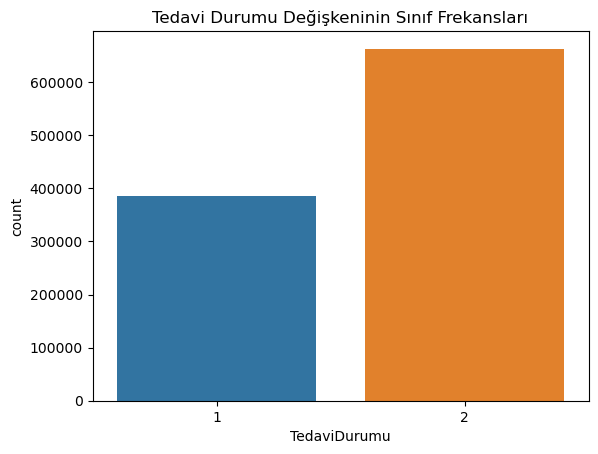

In [58]:
ay = sns.barplot(x = df.TedaviDurumu.value_counts().index, y = df.TedaviDurumu.value_counts(), data = df);#ifade bu şekilde de yazılabilir;
ay.set_title("Tedavi Durumu Değişkeninin Sınıf Frekansları")
# y eksenine TedaviDurumu değişkenine ait kategorileri koy, y eksenine TedaviDurumu değişkeninin sınıflarına ait frekanları koy, verisetimiz df


* **TibbiBirim**

In [59]:
df["TibbiBirim"].head(1) 

0    1
Name: TibbiBirim, dtype: category
Categories (13, int64): [13 < 12 < 11 < 10 ... 4 < 3 < 2 < 1]

In [60]:
df["TibbiBirim"].value_counts()

TibbiBirim
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: count, dtype: int64

In [61]:
import seaborn as sns

#üstteki iki grafik çizme pandas ile yapılan görselleştirmeydi ama biz genelde grafik işlemlerini bize 
#hem görsel hem kullanış olarak daha fazla olanak sağlayan seaborn kütüphanesi kullanarak gerçekleştireceğiz.
#seaborn'u sns şeklinde import ediyoruz

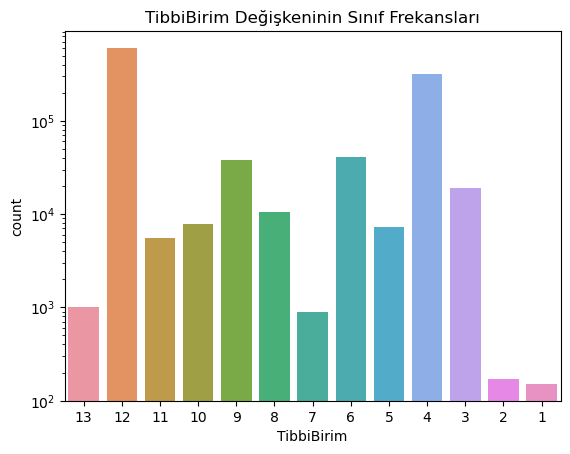

In [62]:
ay = sns.barplot(x = df.TibbiBirim.value_counts().index, y = df.TibbiBirim.value_counts(), data = df); 
ay.set_title("TibbiBirim Değişkeninin Sınıf Frekansları")
ay.set_yscale("log")
# y eksenine TibbiBirim değişkenine ait kategorileri koy, y eksenine TibbiBirim değişkeninin sınıflarına ait frekanları koy, verisetimiz df
# log kullanmamın nedeni değer aralığım çok geniş olduğu için normak grafik kullandığımda 1000 den küçük değerler grafikte gözükmüyor

* **Cinsiyet**

In [63]:
df["Cinsiyet"].head(1) 

0    Kadın
Name: Cinsiyet, dtype: category
Categories (2, object): ['Erkek', 'Kadın']

In [64]:
df["Cinsiyet"].value_counts()

Cinsiyet
Kadın    525064
Erkek    523511
Name: count, dtype: int64

Text(0.5, 1.0, 'Cinsiyet Durumu Değişkeninin Sınıf Frekansları')

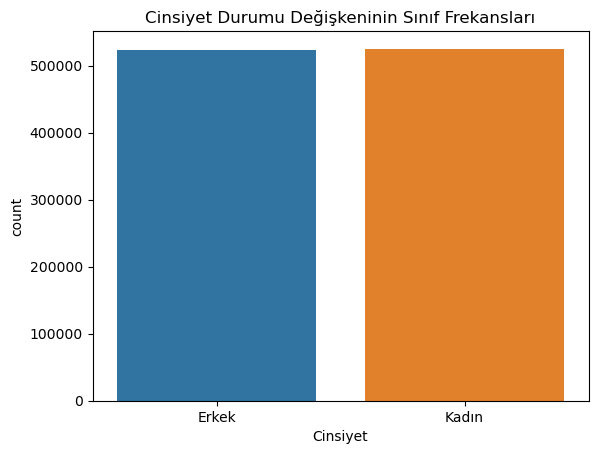

In [65]:
import seaborn as sns

ay = sns.barplot(x = df.Cinsiyet.value_counts().index, y = df.Cinsiyet.value_counts(), data = df); 
ay.set_title("Cinsiyet Durumu Değişkeninin Sınıf Frekansları")
# y eksenine Cinsiyet değişkenine ait kategorileri koy, y eksenine Cinsiyet değişkeninin sınıflarına ait frekanları koy, verisetimiz df

* **HastaTuru**

In [66]:
df["HastaTuru"].head(1) 

0    1
Name: HastaTuru, dtype: category
Categories (2, int64): [1 < 2]

In [67]:
df["HastaTuru"].value_counts()

HastaTuru
1    848544
2    200031
Name: count, dtype: int64

Text(0.5, 1.0, 'HastaTuru Değişkeninin Sınıf Frekansları')

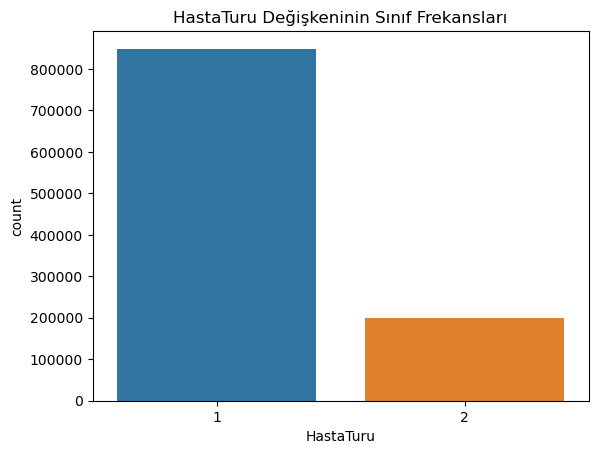

In [68]:
import seaborn as sns

ay = sns.barplot(x = df.HastaTuru.value_counts().index, y = df.HastaTuru.value_counts(), data = df); 
ay.set_title("HastaTuru Değişkeninin Sınıf Frekansları")
# y eksenine HastaTuru değişkenine ait kategorileri koy, y eksenine HastaTuru değişkeninin sınıflarına ait frekanları koy, verisetimiz df

* **SaglikDurumu**

In [69]:
df["SaglikDurumu"].head(1) 

0    Ölü
Name: SaglikDurumu, dtype: category
Categories (2, object): ['Sağ', 'Ölü']

In [70]:
df["SaglikDurumu"].value_counts()

SaglikDurumu
Sağ    971633
Ölü     76942
Name: count, dtype: int64

Text(0.5, 1.0, 'SaglikDurumu Değişkeninin Sınıf Frekansları')

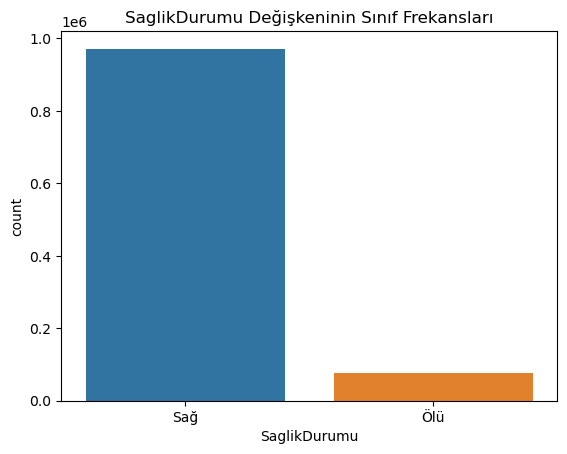

In [71]:
import seaborn as sns

ay = sns.barplot(x = df.SaglikDurumu.value_counts().index, y = df.SaglikDurumu.value_counts(), data = df); 
ay.set_title("SaglikDurumu Değişkeninin Sınıf Frekansları")
# y eksenine SaglikDurumu değişkenine ait kategorileri koy, y eksenine SaglikDurumu değişkeninin sınıflarına ait frekanları koy, verisetimiz df

* **Entube**

In [72]:
df["Entube"].head(1) 

0    NaN
Name: Entube, dtype: category
Categories (2, Int64): [1, 2]

In [73]:
df["Entube"].value_counts()

Entube
2    159050
1     33656
Name: count, dtype: int64

Text(0.5, 1.0, 'Entube Değişkeninin Sınıf Frekansları')

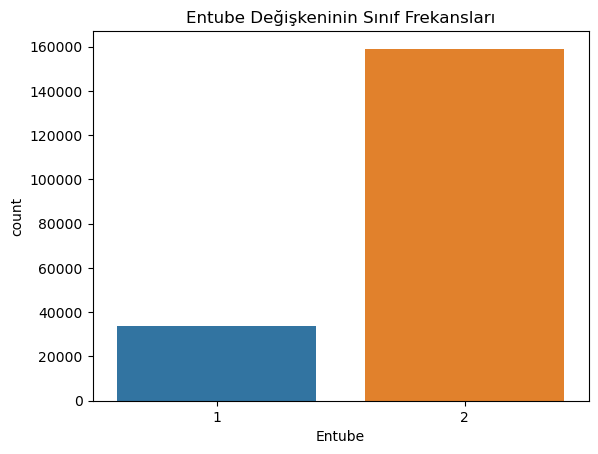

In [74]:
import seaborn as sns

ay = sns.barplot(x = df.Entube.value_counts().index, y = df.Entube.value_counts(), data = df); 
ay.set_title("Entube Değişkeninin Sınıf Frekansları")
# y eksenine Entube değişkenine ait kategorileri koy, y eksenine Entube değişkeninin sınıflarına ait frekanları koy, verisetimiz df

* **Zaturre**

In [75]:
df["Zaturre"].head(1) 

0    1
Name: Zaturre, dtype: category
Categories (2, Int64): [1, 2]

In [76]:
df["Zaturre"].value_counts()

Zaturre
2    892534
1    140038
Name: count, dtype: int64

Text(0.5, 1.0, 'Zaturre Değişkeninin Sınıf Frekansları')

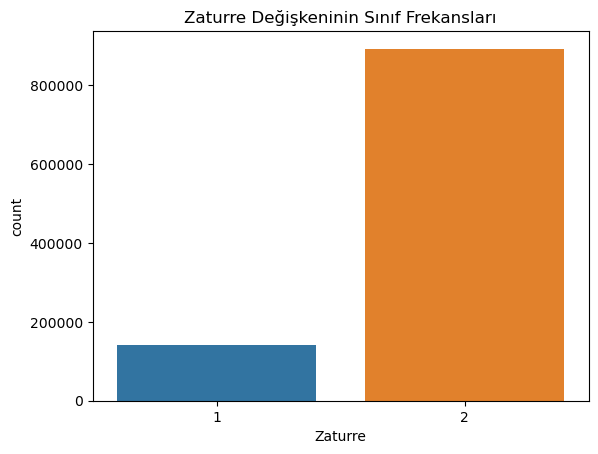

In [77]:
import seaborn as sns

ay = sns.barplot(x = df.Zaturre.value_counts().index, y = df.Zaturre.value_counts(), data = df); 
ay.set_title("Zaturre Değişkeninin Sınıf Frekansları")
# y eksenine Zaturre değişkenine ait kategorileri koy, y eksenine Zaturre değişkeninin sınıflarına ait frekanları koy, verisetimiz df

* **Hamile**

In [78]:
df["Hamile"].head(1) 

0    2
Name: Hamile, dtype: category
Categories (2, Int64): [1, 2]

In [79]:
df["Hamile"].value_counts()

Hamile
2    513179
1      8131
Name: count, dtype: int64

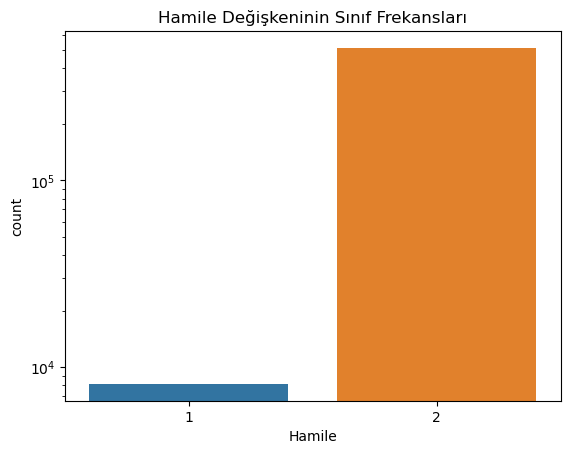

In [80]:
import seaborn as sns

ay = sns.barplot(x = df.Hamile.value_counts().index, y = df.Hamile.value_counts(), data = df); 
ay.set_title("Hamile Değişkeninin Sınıf Frekansları")
ay.set_yscale("log")
# y eksenine Hamile değişkenine ait kategorileri koy, y eksenine Hamile değişkeninin sınıflarına ait frekanları koy, verisetimiz df

* **Diyabet**

In [81]:
df["Diyabet"].head(1) 

0    2
Name: Diyabet, dtype: category
Categories (2, Int64): [1, 2]

In [82]:
df["Diyabet"].value_counts()

Diyabet
2    920248
1    124989
Name: count, dtype: int64

Text(0.5, 1.0, 'Diyabet Değişkeninin Sınıf Frekansları')

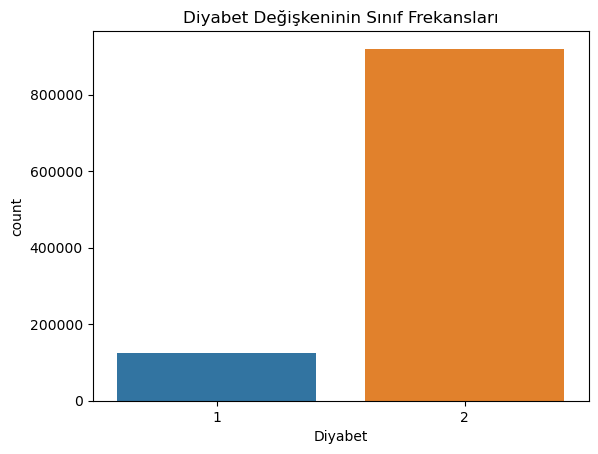

In [83]:
import seaborn as sns

ay = sns.barplot(x = df.Diyabet.value_counts().index, y = df.Diyabet.value_counts(), data = df); 
ay.set_title("Diyabet Değişkeninin Sınıf Frekansları")
# y eksenine Diyabet değişkenine ait kategorileri koy, y eksenine Diyabet değişkeninin sınıflarına ait frekanları koy, verisetimiz df

* **TibbiBirim**

In [84]:
df["KOAH"].head(1) 

0    2
Name: KOAH, dtype: category
Categories (2, Int64): [1, 2]

In [85]:
df["KOAH"].value_counts()

KOAH
2    1030510
1      15062
Name: count, dtype: int64

Text(0.5, 1.0, 'KOAH Değişkeninin Sınıf Frekansları')

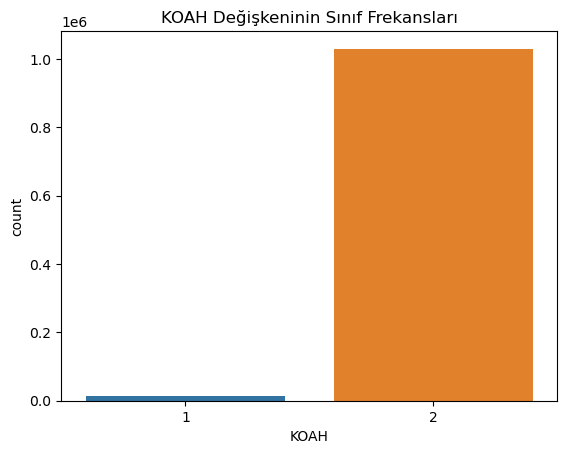

In [86]:
import seaborn as sns

ay = sns.barplot(x = df.KOAH.value_counts().index, y = df.KOAH.value_counts(), data = df); 
ay.set_title("KOAH Değişkeninin Sınıf Frekansları")
# y eksenine KOAH değişkenine ait kategorileri koy, y eksenine KOAH değişkeninin sınıflarına ait frekanları koy, verisetimiz df

* **Astim**

In [87]:
df["Astim"].head(1) 

0    2
Name: Astim, dtype: category
Categories (2, Int64): [1, 2]

In [88]:
df["Astim"].value_counts()

Astim
2    1014024
1      31572
Name: count, dtype: int64

Text(0.5, 1.0, 'Astim Değişkeninin Sınıf Frekansları')

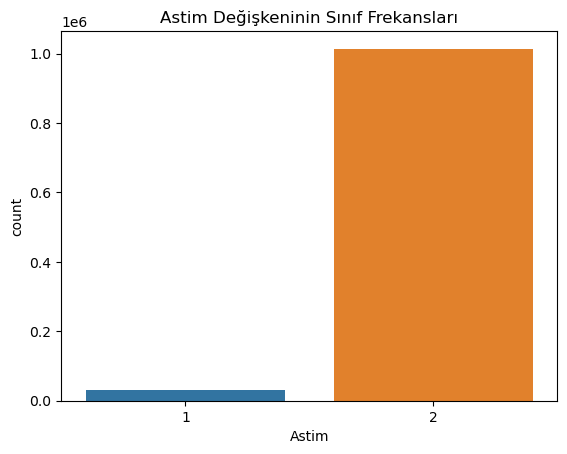

In [89]:
import seaborn as sns

ay = sns.barplot(x = df.Astim.value_counts().index, y = df.Astim.value_counts(), data = df);
ay.set_title("Astim Değişkeninin Sınıf Frekansları")
# y eksenine Astim değişkenine ait kategorileri koy, y eksenine Astim değişkeninin sınıflarına ait frekanları koy, verisetimiz df

* **BagisiklikSistemi**

In [90]:
df["BagisiklikSistemi"].head(1) 

0    2
Name: BagisiklikSistemi, dtype: category
Categories (2, Int64): [1, 2]

In [91]:
df["BagisiklikSistemi"].value_counts()

BagisiklikSistemi
2    1031001
1      14170
Name: count, dtype: int64

Text(0.5, 1.0, 'BagisiklikSistemi Değişkeninin Sınıf Frekansları')

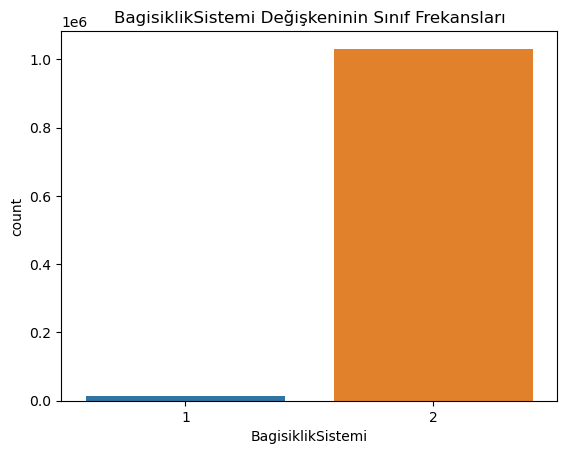

In [92]:
import seaborn as sns

ay = sns.barplot(x = df.BagisiklikSistemi.value_counts().index, y = df.BagisiklikSistemi.value_counts(), data = df); 
ay.set_title("BagisiklikSistemi Değişkeninin Sınıf Frekansları")
# y eksenine BagisiklikSistemi değişkenine ait kategorileri koy, y eksenine BagisiklikSistemi değişkeninin sınıflarına ait frekanları koy, verisetimiz df

* **HiperTansiyon**

In [93]:
df["HiperTansiyon"].head(1) 

0    1
Name: HiperTansiyon, dtype: category
Categories (2, Int64): [1, 2]

In [94]:
df["HiperTansiyon"].value_counts()

HiperTansiyon
2    882742
1    162729
Name: count, dtype: int64

Text(0.5, 1.0, 'HiperTansiyon Değişkeninin Sınıf Frekansları')

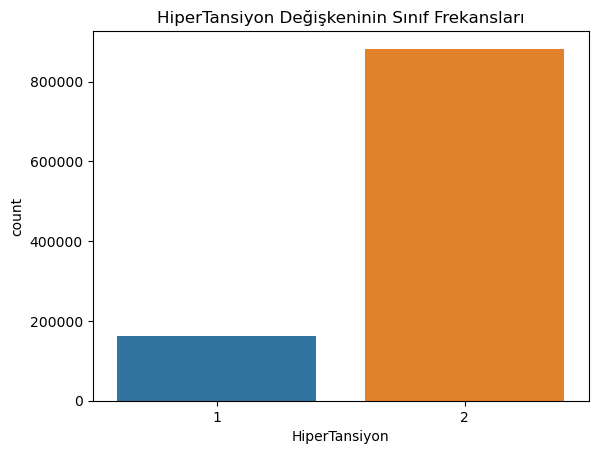

In [95]:
import seaborn as sns

ay = sns.barplot(x = df.HiperTansiyon.value_counts().index, y = df.HiperTansiyon.value_counts(), data = df); 
ay.set_title("HiperTansiyon Değişkeninin Sınıf Frekansları")
# y eksenine HiperTansiyon değişkenine ait kategorileri koy, y eksenine HiperTansiyon değişkeninin sınıflarına ait frekanları koy, verisetimiz df

* **DigerHastalik**

In [96]:
df["DigerHastalik"].head(1) 

0    2
Name: DigerHastalik, dtype: category
Categories (2, Int64): [1, 2]

In [97]:
df["DigerHastalik"].value_counts()

DigerHastalik
2    1015490
1      28040
Name: count, dtype: int64

Text(0.5, 1.0, 'DigerHastalik Değişkeninin Sınıf Frekansları')

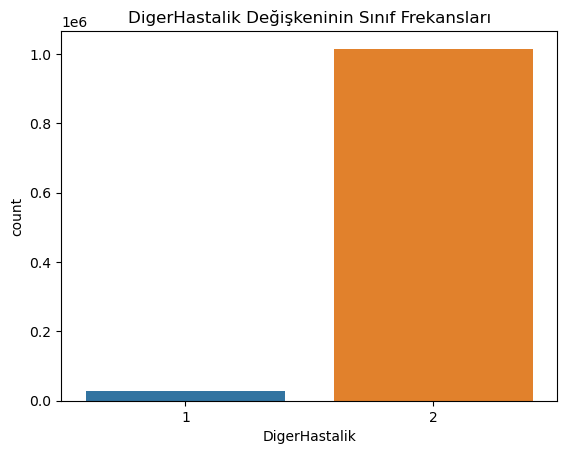

In [98]:
import seaborn as sns

ay = sns.barplot(x = df.DigerHastalik.value_counts().index, y = df.DigerHastalik.value_counts(), data = df);
ay.set_title("DigerHastalik Değişkeninin Sınıf Frekansları")
# y eksenine DigerHastalik değişkenine ait kategorileri koy, y eksenine DigerHastalik değişkeninin sınıflarına ait frekanları koy, verisetimiz df

* **Kardiyovaskuler**

In [99]:
df["Kardiyovaskuler"].head(1) 

0    2
Name: Kardiyovaskuler, dtype: category
Categories (2, Int64): [1, 2]

In [100]:
df["Kardiyovaskuler"].value_counts()

Kardiyovaskuler
2    1024730
1      20769
Name: count, dtype: int64

Text(0.5, 1.0, 'Kardiyovaskuler Değişkeninin Sınıf Frekansları')

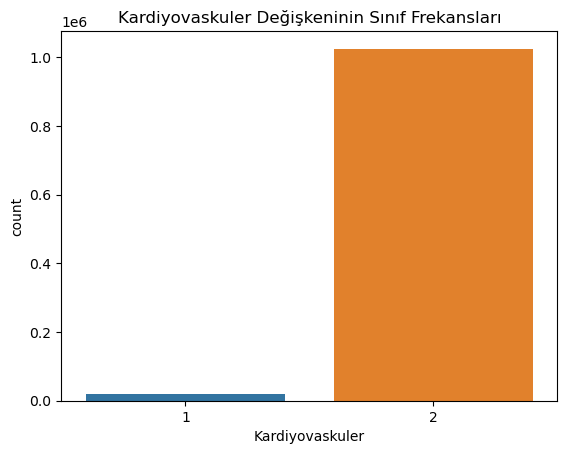

In [101]:
import seaborn as sns

ay = sns.barplot(x = df.Kardiyovaskuler.value_counts().index, y = df.Kardiyovaskuler.value_counts(), data = df); 
ay.set_title("Kardiyovaskuler Değişkeninin Sınıf Frekansları")
# y eksenine Kardiyovaskuler değişkenine ait kategorileri koy, y eksenine Kardiyovaskuler değişkeninin sınıflarına ait frekanları koy, verisetimiz df

* **Obezite**

In [102]:
df["Obezite"].head(1) 

0    2
Name: Obezite, dtype: category
Categories (2, Int64): [1, 2]

In [103]:
df["Obezite"].value_counts()

Obezite
2    885727
1    159816
Name: count, dtype: int64

Text(0.5, 1.0, 'Obezite Değişkeninin Sınıf Frekansları')

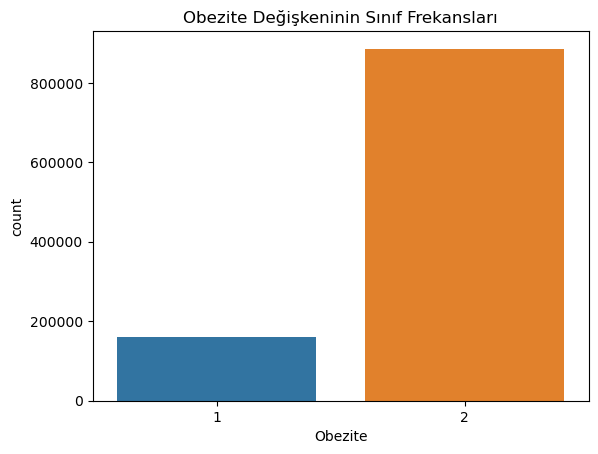

In [104]:
import seaborn as sns

ay = sns.barplot(x = df.Obezite.value_counts().index, y = df.Obezite.value_counts(), data = df); 
ay.set_title("Obezite Değişkeninin Sınıf Frekansları")
# y eksenine Obezite değişkenine ait kategorileri koy, y eksenine Obezite değişkeninin sınıflarına ait frekanları koy, verisetimiz df

* **KronikBobrek**

In [105]:
df["KronikBobrek"].head(1) 

0    2
Name: KronikBobrek, dtype: category
Categories (2, Int64): [1, 2]

In [106]:
df["KronikBobrek"].value_counts()

KronikBobrek
2    1026665
1      18904
Name: count, dtype: int64

Text(0.5, 1.0, 'KronikBobrek Değişkeninin Sınıf Frekansları')

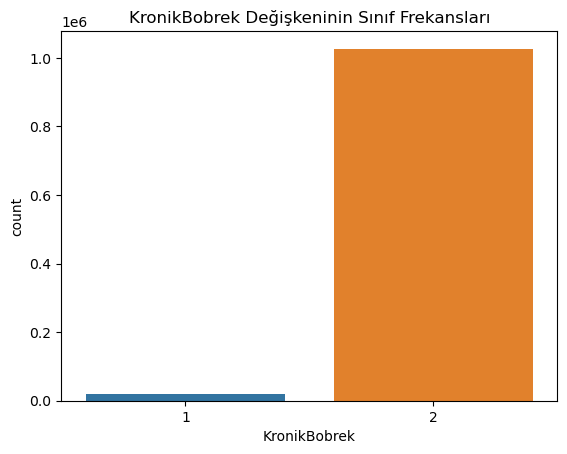

In [107]:
import seaborn as sns

ay = sns.barplot(x = df.KronikBobrek.value_counts().index, y = df.KronikBobrek.value_counts(), data = df); 
ay.set_title("KronikBobrek Değişkeninin Sınıf Frekansları")
# y eksenine KronikBobrek değişkenine ait kategorileri koy, y eksenine KronikBobrek değişkeninin sınıflarına ait frekanları koy, verisetimiz df

* **Sigara**

In [108]:
df["Sigara"].head(1) 

0    2
Name: Sigara, dtype: category
Categories (2, Int64): [1, 2]

In [109]:
df["Sigara"].value_counts()

Sigara
2    960979
1     84376
Name: count, dtype: int64

Text(0.5, 1.0, 'Sigara Değişkeninin Sınıf Frekansları')

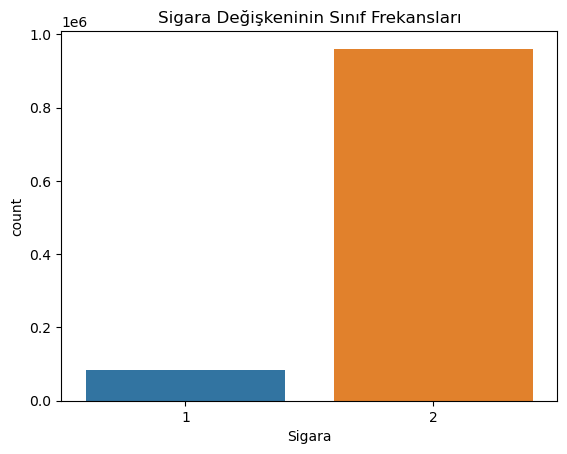

In [110]:
import seaborn as sns

ay = sns.barplot(x = df.Sigara.value_counts().index, y = df.Sigara.value_counts(), data = df); 
ay.set_title("Sigara Değişkeninin Sınıf Frekansları")
# y eksenine Sigara değişkenine ait kategorileri koy, y eksenine Sigara değişkeninin sınıflarına ait frekanları koy, verisetimiz df

* **CovidSiniflandirma**

In [111]:
df["CovidSiniflandirma"].head(1) 

0    3
Name: CovidSiniflandirma, dtype: category
Categories (7, int64): [7 < 6 < 5 < 4 < 3 < 2 < 1]

In [112]:
df["CovidSiniflandirma"].value_counts()

CovidSiniflandirma
7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: count, dtype: int64

Text(0.5, 1.0, 'CovidSiniflandirma Değişkeninin Sınıf Frekansları')

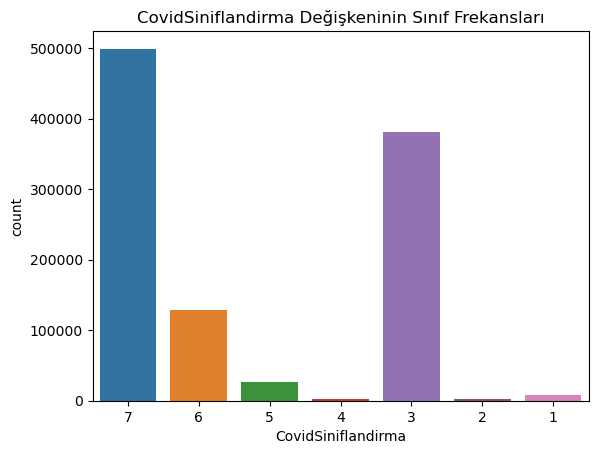

In [113]:
import seaborn as sns

ay = sns.barplot(x = df.CovidSiniflandirma.value_counts().index, y = df.CovidSiniflandirma.value_counts(), data = df); 
ay.set_title("CovidSiniflandirma Değişkeninin Sınıf Frekansları")
# y eksenine CovidSiniflandirma değişkenine ait kategorileri koy, y eksenine CovidSiniflandirma değişkeninin sınıflarına ait frekanları koy, verisetimiz df

* **ICU**

In [114]:
df["ICU"].head(1) 

0    NaN
Name: ICU, dtype: category
Categories (2, Int64): [1, 2]

In [115]:
df["ICU"].value_counts()

ICU
2    175685
1     16858
Name: count, dtype: int64

Text(0.5, 1.0, 'ICU Değişkeninin Sınıf Frekansları')

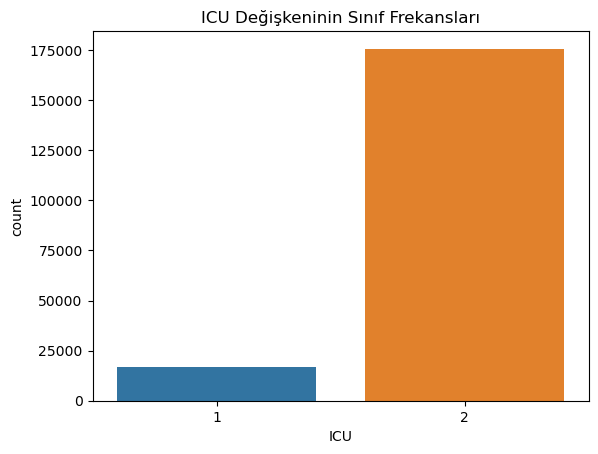

In [116]:
import seaborn as sns

ay = sns.barplot(x = df.ICU.value_counts().index, y = df.ICU.value_counts(), data = df); 
ay.set_title("ICU Değişkeninin Sınıf Frekansları")
# y eksenine ICU değişkenine ait kategorileri koy, y eksenine ICU değişkeninin sınıflarına ait frekanları koy, verisetimiz df

## Çaprazlamalar
Veri seti içerisinde yer alan değişkenlerin etkilerinin birlikte değerlendirilmesi demektir.


In [117]:
import seaborn as sns

In [118]:
df.head()

,Yas,TedaviDurumu,TibbiBirim,Cinsiyet,HastaTuru,SaglikDurumu,Entube,Zaturre,Hamile,Diyabet,...,Astim,BagisiklikSistemi,HiperTansiyon,DigerHastalik,Kardiyovaskuler,Obezite,KronikBobrek,Sigara,CovidSiniflandirma,ICU
0,65,2,1,Kadın,1,Ölü,NaN,1,2,2,...,2,2,1,2,2,2,2,2,3,NaN
1,72,2,1,Erkek,1,Ölü,NaN,1,NaN,2,...,2,2,1,2,2,1,1,2,5,NaN
2,55,2,1,Erkek,2,Ölü,1,2,NaN,1,...,2,2,2,2,2,2,2,2,3,2
3,53,2,1,Kadın,1,Ölü,NaN,2,2,2,...,2,2,2,2,2,2,2,2,7,NaN
4,68,2,1,Erkek,1,Ölü,NaN,2,NaN,1,...,2,2,1,2,2,2,2,2,3,NaN


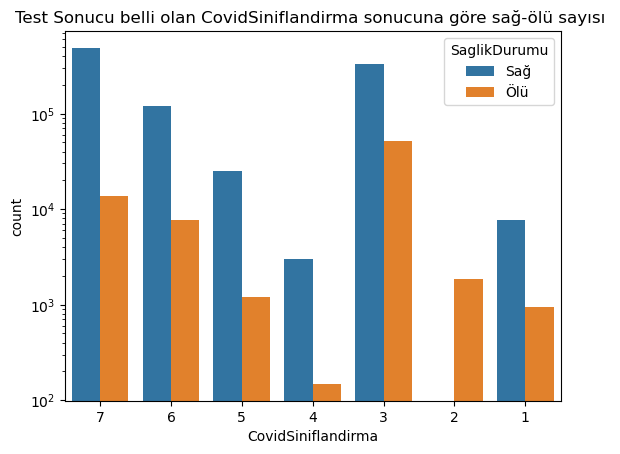

In [119]:
ay = sns.countplot(x="CovidSiniflandirma", hue="SaglikDurumu", data=df)
ay.set_title("Test Sonucu belli olan CovidSiniflandirma sonucuna göre sağ-ölü sayısı ")
ay.set_yscale("log")
#bir boyut daha ekledik.(color kategorik değişkenini hue argümanı ile ekledik)
#Örneğin İdeal sınıfı price'ın yüksek seviyelerinde yoğundu, peki cut'un ideal sınıfının içerisindeki bu yapılanma neden oluşuyor.
#E sınıfı ile D sınıfı idealin price'ın yüksek seviyelerini oluşturduğu gruplanmada bu sınıfı aşağı çekiyor. I ve J sınıfı yukarıya taşıyor.
#Daha fazla açıklanabilirlik elde ettik.

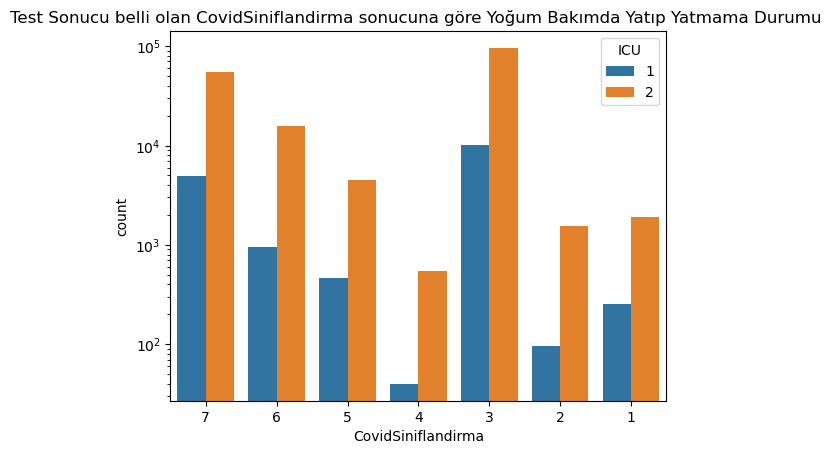

In [120]:
ay = sns.countplot(x="CovidSiniflandirma", hue="ICU", data=df)
ay.set_title("Test Sonucu belli olan CovidSiniflandirma sonucuna göre Yoğum Bakımda Yatıp Yatmama Durumu ")
ay.set_yscale("log")
#bir boyut daha ekledik.(color kategorik değişkenini hue argümanı ile ekledik)
#Örneğin İdeal sınıfı price'ın yüksek seviyelerinde yoğundu, peki cut'un ideal sınıfının içerisindeki bu yapılanma neden oluşuyor.
#E sınıfı ile D sınıfı idealin price'ın yüksek seviyelerini oluşturduğu gruplanmada bu sınıfı aşağı çekiyor. I ve J sınıfı yukarıya taşıyor.
#Daha fazla açıklanabilirlik elde ettik.

Text(0.5, 1.0, 'Sağlık Durumuna göre hastanın Yoğum Bakımda Yatıp Yatmama Durumu ')

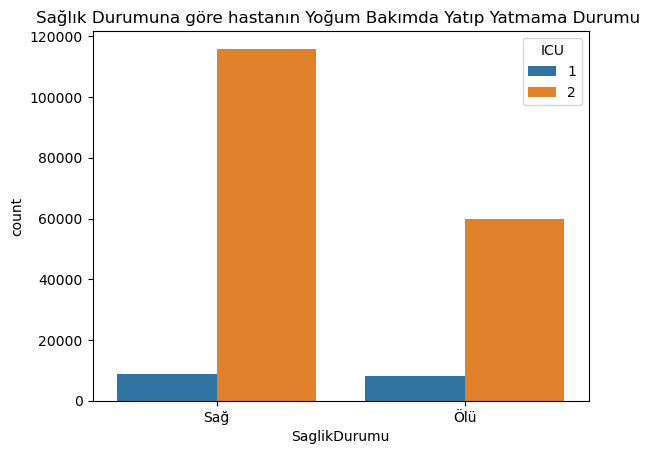

In [121]:
ay = sns.countplot(x="SaglikDurumu", hue="ICU", data=df)
ay.set_title("Sağlık Durumuna göre hastanın Yoğum Bakımda Yatıp Yatmama Durumu ")
#ay.set_yscale("log")
#bir boyut daha ekledik.(color kategorik değişkenini hue argümanı ile ekledik)
#Örneğin İdeal sınıfı price'ın yüksek seviyelerinde yoğundu, peki cut'un ideal sınıfının içerisindeki bu yapılanma neden oluşuyor.
#E sınıfı ile D sınıfı idealin price'ın yüksek seviyelerini oluşturduğu gruplanmada bu sınıfı aşağı çekiyor. I ve J sınıfı yukarıya taşıyor.
#Daha fazla açıklanabilirlik elde ettik.

## Histogram ve Yoğunluk (Sayısal Değişken)
Sayısal değişkenlerin dağılımını ifade etmek için kullanılan veri görselleştirme teknikleridir.
Histogram elimizdeki sayısal değişkenleri belirli aralıklara böler ve bu belirli aralıkların gözlenme sayısını yansıtır. Değişkenimizin belirli aralıklardaki dağılımları ile ilgili bilgiler verir.

In [122]:
import seaborn as sns

In [123]:
df.head()

,Yas,TedaviDurumu,TibbiBirim,Cinsiyet,HastaTuru,SaglikDurumu,Entube,Zaturre,Hamile,Diyabet,...,Astim,BagisiklikSistemi,HiperTansiyon,DigerHastalik,Kardiyovaskuler,Obezite,KronikBobrek,Sigara,CovidSiniflandirma,ICU
0,65,2,1,Kadın,1,Ölü,NaN,1,2,2,...,2,2,1,2,2,2,2,2,3,NaN
1,72,2,1,Erkek,1,Ölü,NaN,1,NaN,2,...,2,2,1,2,2,1,1,2,5,NaN
2,55,2,1,Erkek,2,Ölü,1,2,NaN,1,...,2,2,2,2,2,2,2,2,3,2
3,53,2,1,Kadın,1,Ölü,NaN,2,2,2,...,2,2,2,2,2,2,2,2,7,NaN
4,68,2,1,Erkek,1,Ölü,NaN,2,NaN,1,...,2,2,1,2,2,2,2,2,3,NaN


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   Yas                 1048575 non-null  Int64   
 1   TedaviDurumu        1048575 non-null  category
 2   TibbiBirim          1048575 non-null  category
 3   Cinsiyet            1048575 non-null  category
 4   HastaTuru           1048575 non-null  category
 5   SaglikDurumu        1048575 non-null  category
 6   Entube              192706 non-null   category
 7   Zaturre             1032572 non-null  category
 8   Hamile              521310 non-null   category
 9   Diyabet             1045237 non-null  category
 10  KOAH                1045572 non-null  category
 11  Astim               1045596 non-null  category
 12  BagisiklikSistemi   1045171 non-null  category
 13  HiperTansiyon       1045471 non-null  category
 14  DigerHastalik       1043530 non-null  category
 15

In [125]:
df.describe() #sürekli (sayısal) değişkenlerin betimsel özelliklerine bakalım

,Yas
count,1048575.0
mean,41.794102
std,16.907389
min,0.0
25%,30.0
50%,40.0
75%,53.0
max,121.0


In [126]:
# df_cleaned = df.dropna(subset=["Yas"])
# df_cleaned['Yas'] = df_cleaned['Yas'].astype(int)

In [127]:
df['Yas'] = df['Yas'].astype(int)

In [128]:
df["Yas"].describe() #betimsel özelliklerini ver

count    1.048575e+06
mean     4.179410e+01
std      1.690739e+01
min      0.000000e+00
25%      3.000000e+01
50%      4.000000e+01
75%      5.300000e+01
max      1.210000e+02
Name: Yas, dtype: float64

In [129]:
df["Yas"].head(1) 

0    65
Name: Yas, dtype: int32

In [130]:
df["Yas"].max()

121

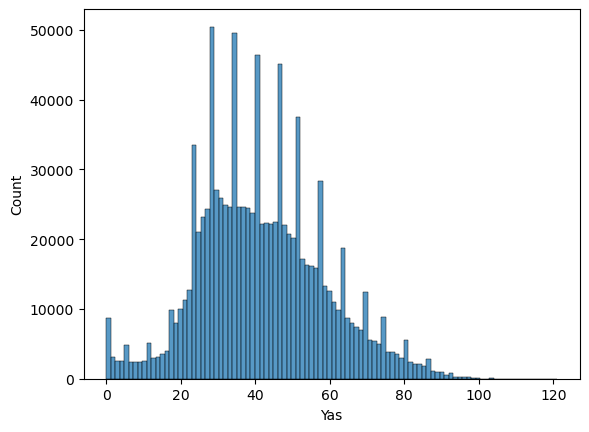

In [138]:
sns.histplot(df.Yas, bins = 100);
#sns.lineplot(x=df_cleaned.index, y=df_cleaned.Yas)
# bins ile bölünen aralıkları belirlenir. Bu parametreyi 10 yaparsak değişkenin değerli 
#10 eşit aralığa ayrılır ve değişkenin o aralıklardaki dağılımı gösterilir.10 sütun gözlenir.

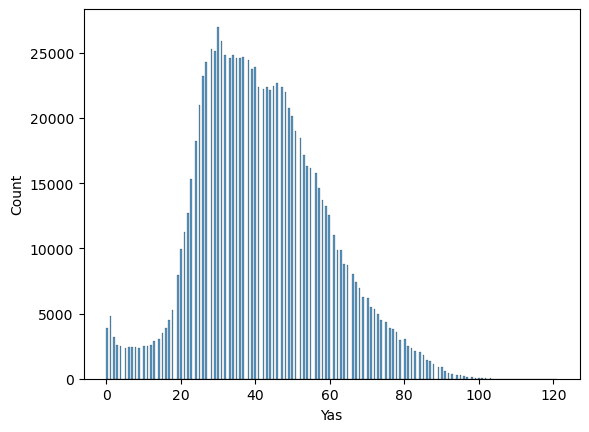

In [132]:
sns.histplot(df.Yas); #displot ile aynı işlevi yerini getirir.

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   Yas                 1048575 non-null  int32   
 1   TedaviDurumu        1048575 non-null  category
 2   TibbiBirim          1048575 non-null  category
 3   Cinsiyet            1048575 non-null  category
 4   HastaTuru           1048575 non-null  category
 5   SaglikDurumu        1048575 non-null  category
 6   Entube              192706 non-null   category
 7   Zaturre             1032572 non-null  category
 8   Hamile              521310 non-null   category
 9   Diyabet             1045237 non-null  category
 10  KOAH                1045572 non-null  category
 11  Astim               1045596 non-null  category
 12  BagisiklikSistemi   1045171 non-null  category
 13  HiperTansiyon       1045471 non-null  category
 14  DigerHastalik       1043530 non-null  category
 15

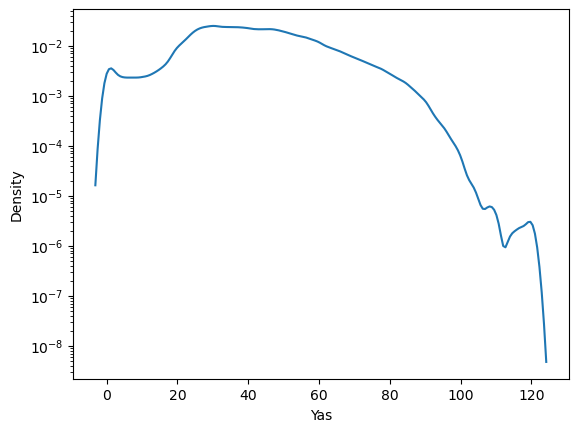

In [134]:
sns.kdeplot(df.Yas,log_scale=(False, True)); # yoğunluğu gösteren çizgi # ölçeği 0 ile 1 arasına alarak çizer
#Her iki grafik de (histogram, yoğunluk) sayısal değişkenin dağılımını görmek için kullanılır ikisini de kullanabiliriz.

## Çaprazlamalar


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


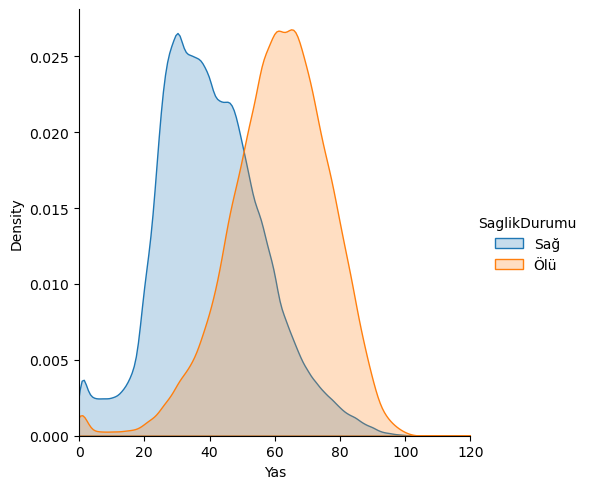

In [135]:
(sns
 .FacetGrid(df,
              hue = "SaglikDurumu",
              height = 5,
              xlim = (0, 120)) # x ekseni 0 ile 100000 arası olsun bu aralıktaki değişime odaklanmak isteyelim
 .map(sns.kdeplot, "Yas", fill= True) #price'a göre yoğunluk grafiği oluşturacağız fakat bunun üzerine boyut ekleyeceğiz (cut kategorik değişken).map ile eklediğimiz boyut ile kde grafiğini eşliyoruz.
 .add_legend() #cut kategori değişkeninin sınıf bilgilerini eklemek için kullanıyoruz.
); # Bu fonksiyon grafik üzerine eklenen boyutları bölerek göstermek için kullanılır.hue, boyut ekleme parametresi

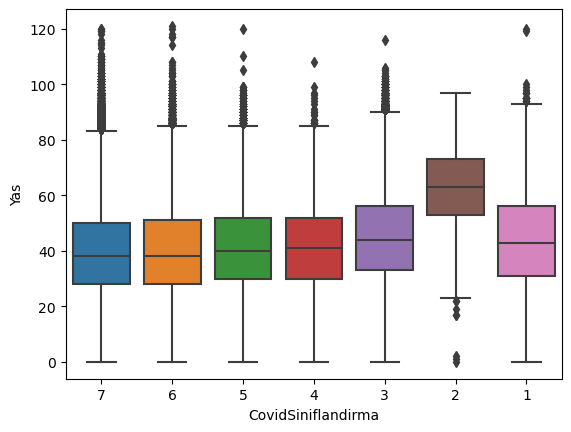

In [136]:
sns.boxplot(x = "CovidSiniflandirma", y = "Yas", data = df);

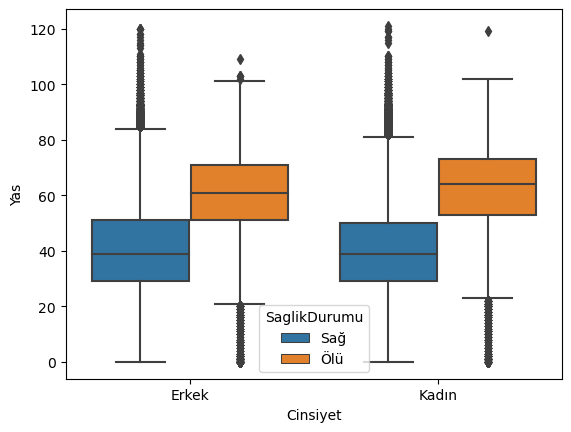

In [137]:
sns.boxplot(x = "Cinsiyet", y = "Yas", hue = "SaglikDurumu", data = df); #üçüncü boyut ekleyelim hue parametresi ile
#gözlemleneceği üzere kadınların hesap ödemesi durumuna bakıldığında cumartesi dışında yüksek bir hesap ödeme söz konudu değildir.

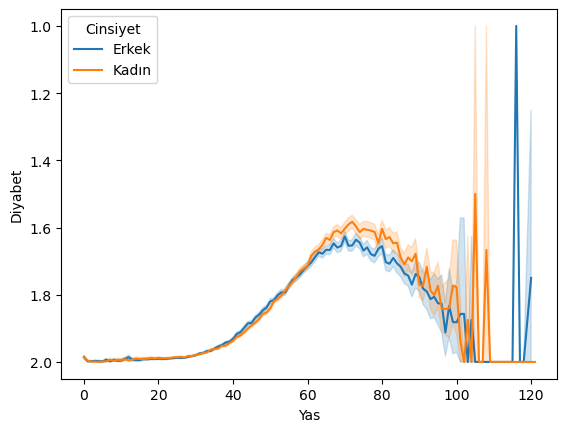

In [157]:
sns.lineplot(x = "Yas", y = "Diyabet", hue = "Cinsiyet", data = df);

* 110'lu yaşlarda erkek bireylerde diyabet oranı yüksektir.
* Kadınlarda ise 100'lü yaşlarda diyabet oranı yüksektir.

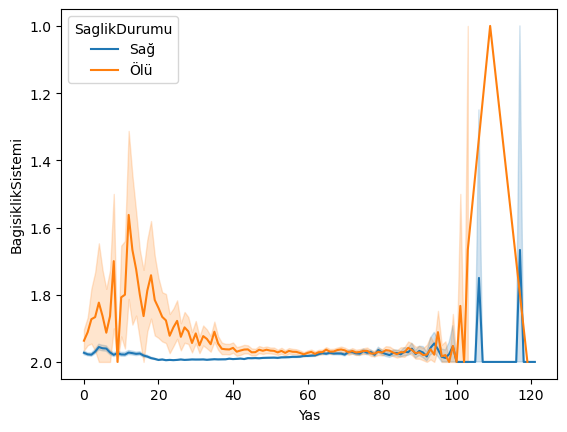

In [166]:
sns.lineplot(x = "Yas", y = "BagisiklikSistemi", hue = "SaglikDurumu", data = df);

* Covid, 100'lü yaşlarda bulunan hastaların bağışıklılığını etkileyerek kötü duruma getirmiştir ve ölüm sayısını artırmıştır.
* Aynı zamanda 0-20 yaş arasındaki bireylerin bağışıklılık sistemini etkileyerek ölüm oranını arttığı gözükmektedir.